<a href="https://colab.research.google.com/github/tarang7895/Loan_Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. IMPORTING THE LIBRARIES**

In [ ]:
# NumPy -> To perform the mathematical operation
import numpy as np

# Pandas -> Data Manipulation tool
import pandas as pd

# Matplotlib -> Data Visualisation tool
import matplotlib.pyplot as plt

# Seaborn -> Data Visualisation tool
import seaborn as sns

# ReGex -> Data Cleaning
import re

# Label Encoder -> assign numerical values to categories where order matters
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Import ExtraTreesClassifier, RandomForestClassifier from sklearn for feature selection
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

# Import RandomizedSearchCV, train_test_split from sklearn to perform Hyperparameter Tuning and splitting the data respectively
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Import confusion_matrix and classification_report from sklearn
from sklearn.metrics import confusion_matrix, classification_report

# Import DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Import pickle to dump the model
import pickle

# **2. IMPORTING THE DATASET**


*   The dataset contains the information of the people who has got the loan or not depending upon various parameters. 



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA ANALYSIS/Training Data.csv")
df_test = pd.read_csv('/content/drive/MyDrive/DATA ANALYSIS/Testing Data.csv')

Creating the copy of the dataset.

In [ ]:
new_df = df.copy()
new_df_test = df_test.copy()

# **3. EXPLORATORY DATA ANALAYSIS (EDA)**

* **DATA EXPLORATION**

In [ ]:
# To view the top 5 rows and all the columns of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# To view the last 5 rows of the dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
# To view the top 5 rows and all the columns of testing dataset
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# To view the last 5 rows of the testing dataset
df_test.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [ ]:
# To check the total number of datapoints (rows) and features (columns)
df.shape

(614, 13)

Conclusion : In the training dataset, we have 614 datapoints and 13 features

In [ ]:
# To check the total number of datapoints (rows) and features (columns)
df_test.shape

(367, 12)

Conclusion : In the testing dataset, we have 367 datapoints and 12 features

In [ ]:
# Check the data types of features.
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Returns brief information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* **Observation:**
1. The dataset has 614 datapoints and 13 columns with target variable as Loan_Status
2. The dataset has missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History







In [ ]:
# Returns brief information about the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
# Reurns the brief of statistical infomation
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Check the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* **Conclusion:** This shows the number of null values in each column

In [ ]:
# Check the null values
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

* **Conclusion:** This shows the number of null values in each column

In [ ]:
# Check the duplicate datapoint
df.duplicated().sum()

0

Conclusion: The data set doesn't contains any duplicate datapoint

* **DATA CLEANING AND DATA MANIPULATION**

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
# Drop the Loan_ID
# Since loan_ID will not help us in analysing the data, we'll delete this column from both the dataset. 
df.drop('Loan_ID', axis = 1, inplace = True)
df_test.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
# Check the unique values in 'Gender'
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
# Check the number of unique values in Gender
df['Gender'].nunique()

2

In [ ]:
# Check the unique values in 'Gender'
df_test['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
# Check the frequency of each category in Gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
# Check the frequency of each category in Gender
df_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [ ]:
# Check the number of null values in Gender
df.Gender.isnull().sum()

13

Conclusion: The Gender column has 13 null values 

In [ ]:
# Filling the null values in Gender
# Since we have 489 males and 112 females, the mode of the Gender is 'MALE' we'll fill all the null values with 'male'
df.Gender.fillna('Male', inplace = True)

In [ ]:
# Filling the null values in Gender
# Since we have 286 males and 70 females, the mode of the Gender is 'MALE' we'll fill all the null values with 'male'
df_test.Gender.fillna('Male', inplace = True)

In [ ]:
df.Gender.isnull().sum()

0

In [ ]:
# Since there are categorial features in this column, covert it into numberical features using pandas get_dummies 
df.Gender = pd.get_dummies(df.Gender, drop_first = True)

In [ ]:
# Since there are categorial features in this column, covert it into numberical features using pandas get_dummies 
df_test.Gender = pd.get_dummies(df_test.Gender, drop_first = True)

In [ ]:
df.Gender.value_counts()
# Male -> 1
# Female -> 0

1    502
0    112
Name: Gender, dtype: int64

In [ ]:
df_test.Gender.value_counts()
# Male -> 1
# Female -> 0

1    297
0     70
Name: Gender, dtype: int64

In [ ]:
# Change the data type of Gender to integer
df.Gender = df.Gender.astype('int')

In [ ]:
# Change the data type of Gender to integer
df_test.Gender = df_test.Gender.astype('int')

In [ ]:
df.Gender.dtype

dtype('int64')

In [ ]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
# Check the unique values in 'Married' column
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# Check the unique values in 'Married' column
df_test.Married.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Check the number of unique values in Married
df.Married.isnull().sum()

3

In [ ]:
# Check the frequency of each category in Married
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
# Filling the null values of Married.
# Since the maximum number of respondents are married, fill the null values by 'Yes'
df.Married.fillna('Yes', inplace = True)

In [ ]:
df.Married.isnull().sum()

0

In [ ]:
# Since there are categorial features in this column, we covert it into numberical features using pandas get_dummies 
df.Married = pd.get_dummies(df.Married, drop_first = True)

In [ ]:
# Since there are categorial features in this column, we covert it into numberical features using pandas get_dummies 
df_test.Married = pd.get_dummies(df_test.Married, drop_first = True)

In [ ]:
df.Married.value_counts()
# Yes -> 1
# No -> 0

1    401
0    213
Name: Married, dtype: int64

In [ ]:
df_test.Married.value_counts()
# Yes -> 1
# No -> 0

1    233
0    134
Name: Married, dtype: int64

In [ ]:
# Change the data type of Married to integer
df.Married = df.Married.astype('int')

In [ ]:
# Change the data type of Married to integer
df_test.Married = df_test.Married.astype('int')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 57.7+ KB


In [ ]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
# Check the unique values in 'Dependents' column
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
# Check the unique values in 'Dependents' column
df_test.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
# Check the frequency of each category in Dependents
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# Check the frequency of each category in Dependents
df_test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
# Convert '3+' to '4' using replace function to have uniformity in data 
df.Dependents.replace('3+', '4', inplace = True)

In [ ]:
# Convert '3+' to '4' using replace function to have uniformity in data 
df_test.Dependents.replace('3+', '4', inplace = True)

In [ ]:
# Check the number of null values in Dependents
df.Dependents.isnull().sum()

15

In [ ]:
# Find the mode of the Dependents
df.Dependents.mode()

0    0
dtype: object

In [ ]:
# Find the median of the Dependents
df.Dependents.median()

0.0

In [ ]:
# Find the mode and median of the Dependents in testing dataset
print(df_test.Dependents.mode())
print(df_test.Dependents.median())

0    0
dtype: object
0.0


In [ ]:
# Filling the null values of Dependents.
# Since the mode and median of Dependents is '0', fill the null values by '0'
df.Dependents.fillna('0', inplace = True)

In [ ]:
# Filling the null values of Dependents.
# Since the mode and median of Dependents is '0', fill the null values by '0'
df_test.Dependents.fillna('0', inplace = True)

In [ ]:
print(df.Dependents.isnull().sum())
print(df_test.Dependents.isnull().sum())

0
0


In [ ]:
# Convert the data type of Dependents from object to integer
df.Dependents = df.Dependents.astype('int')

In [ ]:
# Convert the data type of Dependents from object to integer
df_test.Dependents = df_test.Dependents.astype('int')

In [ ]:
df.Dependents.dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 57.7+ KB


In [ ]:
# Check the unique values of 'Education' column
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
# Check the unique values of 'Education' column
df_test.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
# Check the frequency of each category in Education
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
# Check the frequency of each category in Education
df_test.Education.value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [ ]:
# Convert Categorical features to numerical features
# Since order of Education matters, we use Label Encoding to convert it into numerical values.

# Create an object
le = LabelEncoder()

# Encode labels in column 'Education'
df.Education = le.fit_transform(df.Education)


In [ ]:
# Encode labels in column 'Education'
df_test.Education = le.fit_transform(df_test.Education)


In [ ]:
df.Education.value_counts()

0    480
1    134
Name: Education, dtype: int64

In [ ]:
df_test.Education.value_counts()

0    283
1     84
Name: Education, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 57.7+ KB


In [ ]:
# Check the unique values of 'Self_Employed' column.
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# Check the unique values of 'Self_Employed' column.
df_test.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# Check the frequency of each category in Self_Employed
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
# Check the frequency of each category in Self_Employed
df_test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
# Check the number of null values in Self_Employed
df.Self_Employed.isnull().sum()

32

In [ ]:
# Fill the null values
# Since the maximum number of people are not self employed, we fill the null values with 'No'
df.Self_Employed.fillna('No', inplace = True)

In [ ]:
# Fill the null values
# Since the maximum number of people are not self employed, we fill the null values with 'No'
df_test.Self_Employed.fillna('No', inplace = True)

In [ ]:
# Since there are categorial features in this column, we covert it into numberical features using pandas get_dummies 
df.Self_Employed = pd.get_dummies(df.Self_Employed, drop_first = True)

In [ ]:
# Since there are categorial features in this column, we covert it into numberical features using pandas get_dummies 
df_test.Self_Employed = pd.get_dummies(df_test.Self_Employed, drop_first = True)

In [ ]:
df.Self_Employed.value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [ ]:
# Change the data type of Self_Employed to integer
df.Self_Employed = df.Self_Employed.astype('int')

In [ ]:
# Change the data type of Self_Employed to integer
df_test.Self_Employed = df_test.Self_Employed.astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [ ]:
# Find the minimum and maximum value of ApplicantIncome
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


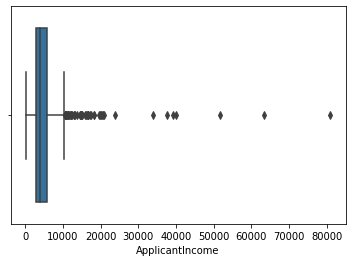

In [ ]:
# Check for outlier in ApplicantIncome using boxplot 
sns.boxplot(df.ApplicantIncome)

Conclusion: We have outliers in ApplicantIncome

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


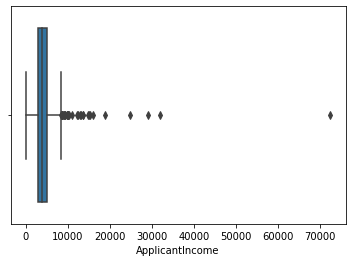

In [ ]:
# Check for outlier in ApplicantIncome using boxplot 
sns.boxplot(df_test.ApplicantIncome)

In [ ]:
# Changing the data type of ApplicantIncome
df.ApplicantIncome = df.ApplicantIncome.astype('float')

In [ ]:
# Changing the data type of ApplicantIncome
df_test.ApplicantIncome = df_test.ApplicantIncome.astype('float')

In [ ]:
# Find the minimum and maximum value of CoapplicantIncome
df.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [ ]:
df.CoapplicantIncome.value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

Conclusion: Maximum of Coapplicant have no income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


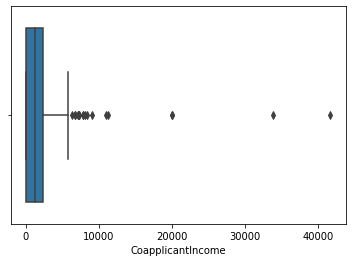

In [ ]:
# Check for outlier in CoapplicantIncome using boxplot 
sns.boxplot(df.CoapplicantIncome)

**Conclusion:** We have outliers in CoapplicantIncome

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


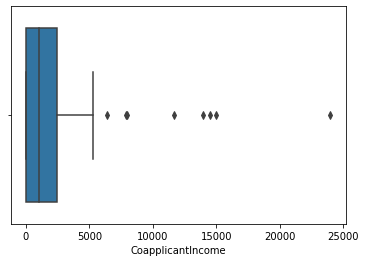

In [ ]:
# Check for outlier in CoapplicantIncome using boxplot 
sns.boxplot(df_test.CoapplicantIncome)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(5), object(2)
memory usage: 57.7+ KB


In [ ]:
# Check the unique values of LoanAmount
df.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [ ]:
# Find the frequency of each category in LoanAmount
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
# Number of null values in LoanAmount
df.LoanAmount.isnull().sum()

22

In [ ]:
# Number of null values in LoanAmount
df_test.LoanAmount.isnull().sum()

5

In [ ]:
# Find the mean, median and mode of LoanAmount
print('Mean: ',df.LoanAmount.mean())
print('Median: ',df.LoanAmount.median())
print('Mode: ',df.LoanAmount.mode())

Mean:  146.41216216216216
Median:  128.0
Mode:  0    120.0
dtype: float64


In [ ]:
# Since we have outliers in LoanAmount, choosing mean for filling null values is not appropiate and hence, we use median to fill the null values
df.LoanAmount.fillna(df.LoanAmount.median(), inplace = True)

In [ ]:
# Find the mean, median and mode of LoanAmount
print('Mean: ',df_test.LoanAmount.mean())
print('Median: ',df_test.LoanAmount.median())
print('Mode: ',df_test.LoanAmount.mode())

Mean:  136.13259668508286
Median:  125.0
Mode:  0    150.0
dtype: float64


In [ ]:
# Since we have outliers in LoanAmount, choosing mean for filling null values is not appropiate and hence, we use median to fill the null values
df_test.LoanAmount.fillna(df_test.LoanAmount.median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


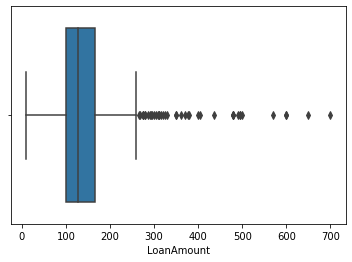

In [ ]:
# Check for outliers in LoanAmount using boxplot
sns.boxplot(df.LoanAmount)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


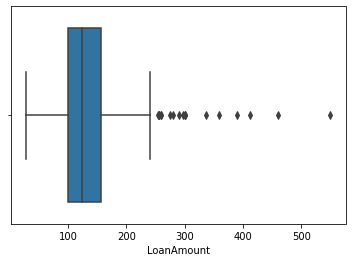

In [ ]:
# Check for outliers in LoanAmount using boxplot
sns.boxplot(df_test.LoanAmount)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(5), object(2)
memory usage: 57.7+ KB


In [ ]:
# Check the unique values of Loan_Amount_Term
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
# Find the frequency of each category in Loan_Amount_Term
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Find the Number of null values in Loan_Amount_Term
df.Loan_Amount_Term.isnull().sum()

14

In [ ]:
# Find the mean, median and mode of Loan_Amount_Term
print(df.Loan_Amount_Term.mean())
print(df.Loan_Amount_Term.median())
print(df.Loan_Amount_Term.mode())

342.0
360.0
0    360.0
dtype: float64


In [ ]:
# Filling the null values of Loan_Amount_Term.
# Since the mode and median of Loan_Amount_Term is '360', fill the null values by '360'
df.Loan_Amount_Term.fillna('360', inplace = True)

In [ ]:
# Find the mean, median and mode of Loan_Amount_Term
print(df_test.Loan_Amount_Term.mean())
print(df_test.Loan_Amount_Term.median())
print(df_test.Loan_Amount_Term.mode())

342.53739612188366
360.0
0    360.0
dtype: float64


In [ ]:
# Filling the null values of Loan_Amount_Term.
# Since the mode and median of Loan_Amount_Term is '360', fill the null values by '360'
df_test.Loan_Amount_Term.fillna('360', inplace = True)

In [ ]:
# Change the data type of Loan_Amount_Term to integer
df.Loan_Amount_Term = df.Loan_Amount_Term.astype('int')

In [ ]:
# Change the data type of Loan_Amount_Term to integer
df_test.Loan_Amount_Term = df_test.Loan_Amount_Term.astype('int')

In [ ]:
df.Loan_Amount_Term.value_counts()

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Convert the term of loan from months to years by divind each term by 12
df.Loan_Amount_Term = df.Loan_Amount_Term//12

In [ ]:
# Convert the term of loan from months to years by divind each term by 12
df_test.Loan_Amount_Term = df_test.Loan_Amount_Term//12

In [ ]:
df.Loan_Amount_Term.value_counts()

30    526
15     44
40     15
25     13
20      4
7       4
10      3
5       2
3       2
1       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df_test.Loan_Amount_Term.value_counts()

30    317
15     22
40      8
25      7
20      4
7       3
5       1
1       1
29      1
3       1
10      1
0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Change the column name of Loan_Amount_Term to Loan_Amount_Term(in years)
df.rename(columns= {'Loan_Amount_Term':'Loan_Amount_Term(in years)'}, inplace = True)

In [ ]:
# Change the column name of Loan_Amount_Term to Loan_Amount_Term(in years)
df_test.rename(columns= {'Loan_Amount_Term':'Loan_Amount_Term(in years)'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      614 non-null    int64  
 1   Married                     614 non-null    int64  
 2   Dependents                  614 non-null    int64  
 3   Education                   614 non-null    int64  
 4   Self_Employed               614 non-null    int64  
 5   ApplicantIncome             614 non-null    float64
 6   CoapplicantIncome           614 non-null    float64
 7   LoanAmount                  614 non-null    float64
 8   Loan_Amount_Term(in years)  614 non-null    int64  
 9   Credit_History              564 non-null    float64
 10  Property_Area               614 non-null    object 
 11  Loan_Status                 614 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [ ]:
# Check the unique values of Credit_History
df.Credit_History.unique()

array([ 1.,  0., nan])

In [ ]:
# Check the unique values of Credit_History
df_test.Credit_History.unique()

array([ 1., nan,  0.])

In [ ]:
# Find the frequency of each category in Credit_History
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
# Find the frequency of each category in Credit_History
df_test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [ ]:
# Check the number of null values in Credit_History
df.Credit_History.isnull().sum()

50

In [ ]:
# Since the mode of Credit_History is '1.0', fill the null values with '1.0'
df.Credit_History.fillna(1.0, inplace = True)

In [ ]:
# Since the mode of Credit_History is '1.0', fill the null values with '1.0'
df_test.Credit_History.fillna(1.0, inplace = True)

In [ ]:
# Find the frequency of each category in Credit_History
df_test.Credit_History.value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

In [ ]:
# Change the data type of Credit_History to integer
df.Credit_History = df.Credit_History.astype('int')

In [ ]:
# Change the data type of Credit_History to integer
df_test.Credit_History = df_test.Credit_History.astype('int')

In [ ]:
df.Credit_History.value_counts()

1    525
0     89
Name: Credit_History, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      614 non-null    int64  
 1   Married                     614 non-null    int64  
 2   Dependents                  614 non-null    int64  
 3   Education                   614 non-null    int64  
 4   Self_Employed               614 non-null    int64  
 5   ApplicantIncome             614 non-null    float64
 6   CoapplicantIncome           614 non-null    float64
 7   LoanAmount                  614 non-null    float64
 8   Loan_Amount_Term(in years)  614 non-null    int64  
 9   Credit_History              614 non-null    int64  
 10  Property_Area               614 non-null    object 
 11  Loan_Status                 614 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 57.7+ KB


In [ ]:
# Check the unique values of Property_Area
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
# Check the unique values of Property_Area
df_test.Property_Area.unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [ ]:
# Check for the frequency of each category
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
# Check for the number of null values
df.Property_Area.isnull().sum()

0

In [ ]:
# Since there are categorial features in this column, covert it into numberical features using replace function
# Urban -> 0
# Rural -> 1
# Semiurban -> 2

df.Property_Area.replace(['Urban', 'Rural', 'Semiurban'], [0,1,2], inplace = True)

In [ ]:
# Since there are categorial features in this column, covert it into numberical features using replace function
# Urban -> 0
# Rural -> 1
# Semiurban -> 2

df_test.Property_Area.replace(['Urban', 'Rural', 'Semiurban'], [0,1,2], inplace = True)

In [ ]:
df.Property_Area.value_counts()

2    233
0    202
1    179
Name: Property_Area, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      614 non-null    int64  
 1   Married                     614 non-null    int64  
 2   Dependents                  614 non-null    int64  
 3   Education                   614 non-null    int64  
 4   Self_Employed               614 non-null    int64  
 5   ApplicantIncome             614 non-null    float64
 6   CoapplicantIncome           614 non-null    float64
 7   LoanAmount                  614 non-null    float64
 8   Loan_Amount_Term(in years)  614 non-null    int64  
 9   Credit_History              614 non-null    int64  
 10  Property_Area               614 non-null    int64  
 11  Loan_Status                 614 non-null    object 
dtypes: float64(3), int64(8), object(1)
memory usage: 57.7+ KB


In [ ]:
# Check the unique values of Loan_Status
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
# Check for the frequency of each category
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# Since there are categorial features in this column, we covert it into numberical features using pandas get_dummies 
df.Loan_Status = pd.get_dummies(df.Loan_Status, drop_first = True)

In [ ]:
# Change the data type of Loan_Status to integer
df.Loan_Status = df.Loan_Status.astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      614 non-null    int64  
 1   Married                     614 non-null    int64  
 2   Dependents                  614 non-null    int64  
 3   Education                   614 non-null    int64  
 4   Self_Employed               614 non-null    int64  
 5   ApplicantIncome             614 non-null    float64
 6   CoapplicantIncome           614 non-null    float64
 7   LoanAmount                  614 non-null    float64
 8   Loan_Amount_Term(in years)  614 non-null    int64  
 9   Credit_History              614 non-null    int64  
 10  Property_Area               614 non-null    int64  
 11  Loan_Status                 614 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 57.7 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      367 non-null    int64  
 1   Married                     367 non-null    int64  
 2   Dependents                  367 non-null    int64  
 3   Education                   367 non-null    int64  
 4   Self_Employed               367 non-null    int64  
 5   ApplicantIncome             367 non-null    float64
 6   CoapplicantIncome           367 non-null    int64  
 7   LoanAmount                  367 non-null    float64
 8   Loan_Amount_Term(in years)  367 non-null    int64  
 9   Credit_History              367 non-null    int64  
 10  Property_Area               367 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 31.7 KB


* **DATA VISUALISATION**

**Q1. What's the ratio of Male to Female?**

In [ ]:
print(df.Gender.value_counts()[1], ':', df.Gender.value_counts()[0])

502 : 112


**Conclusion:** The ratio of Male to Female in  the dataset is 502 : 112

**Q2. How many Males are married and non-married?**

In [ ]:
# Splitting the data into groups based on Gender and Married and apply size function to count the distinct rows
g = df.groupby(['Gender', 'Married']).size()

In [ ]:
# Viewing the grouped size
g

Gender  Married
0       0           80
        1           32
1       0          133
        1          369
dtype: int64

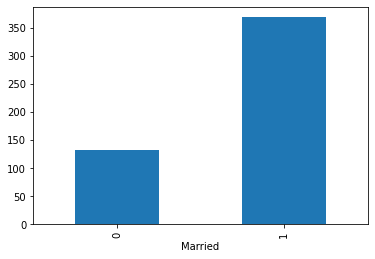

In [ ]:
# Plotting the grouped data of Males
g[1].plot.bar()

**Conclusion:** There are 369 males that are married and 133 males that are non-married

**Q3. How many Females are married and non-married?**

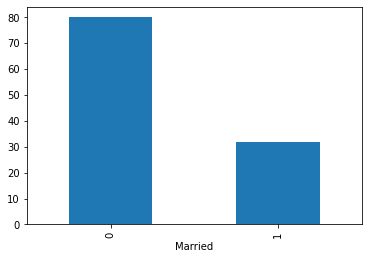

In [ ]:
# Plotting the grouped data of Females
g[0].plot.bar()

**Conclusion:** There are 80 married and 32 non-married females in the dataset.

**Q4. How many Males and Females are graduated and non-graduated with respect to their Marital status?**

In [ ]:
# Splitting the data into groups based on Gender, Married & Education and apply size function to count the distinct rows
g1 = df.groupby(['Gender', 'Married', 'Education']).size()

In [ ]:
# Viewing the grouped size
g1

# Gender : 1-> male, 0-> female
# Married: 1-> Yes, 0-> No
# Education 1-> Not Graduate , 0-> Graduate        


Gender  Married  Education
0       0        0             66
                 1             14
        1        0             26
                 1              6
1       0        0            102
                 1             31
        1        0            286
                 1             83
dtype: int64

**Conclusion:** From the above data it can be concluded that 

*   66 non-married females are Graduate and 14 are non-graduate.
*   26 married females are Graduate and 6 are non-graduate.

*   102 non-married males are Graduate and 31 are non-graduate.
*   286 married males are Graduate and 83 are non-graduate.





**Q5. Which type of encoding will be required to perform on the "Education" column?**

Ans. From above, the encoding used was Label Encoding since order of education matters.

**Q6. Is it a male or a female whose loan amount is the highest?**

In [ ]:
# Organize the data into group based on Gender and perform aggregation function (max) on loan amount.  
g2 = df.groupby('Gender')['LoanAmount'].agg('max')

In [ ]:
g2

Gender
0    600.0
1    700.0
Name: LoanAmount, dtype: float64

**Conclusion:** Male has the highest loan amount.

**Q7. The specification and information about the applicant who has the highest income.**

In [ ]:
df[df.ApplicantIncome == max(df.ApplicantIncome)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term(in years),Credit_History,Property_Area,Loan_Status
409,1,1,4,0,0,81000.0,0.0,360.0,30,0,1,0


**Conclusion:** The person who has the highest income i.e. 81000 is male and married. He is graudated but not self-Employed. He has taken a loan amount of 360,000 for a term period of 30 years. He has the property in Rural area. 

* **Dealing with outliers**

In [ ]:
# Since we have outliers in ApplicantIncome, normalize it using MinMaxScaler
scaler = MinMaxScaler()
df['ApplicantIncome']= scaler.fit_transform(df[['ApplicantIncome']])
df['ApplicantIncome']

0      0.070489
1      0.054830
2      0.035250
3      0.030093
4      0.072356
         ...   
609    0.034014
610    0.048930
611    0.097984
612    0.091936
613    0.054830
Name: ApplicantIncome, Length: 614, dtype: float64

In [ ]:
# Since we have outliers in ApplicantIncome, normalize it using MinMaxScaler
scaler = MinMaxScaler()
df_test['ApplicantIncome']= scaler.fit_transform(df_test[['ApplicantIncome']])
df_test['ApplicantIncome']

0      0.078865
1      0.042411
2      0.068938
3      0.032263
4      0.045168
         ...   
362    0.055274
363    0.057329
364    0.044810
365    0.068938
366    0.126846
Name: ApplicantIncome, Length: 367, dtype: float64

In [ ]:
# Since we have outliers in CoapplicantIncome, normalize it using MinMaxScaler
scaler = MinMaxScaler()
df['CoapplicantIncome']= scaler.fit_transform(df[['CoapplicantIncome']])
df['CoapplicantIncome']

0      0.000000
1      0.036192
2      0.000000
3      0.056592
4      0.000000
         ...   
609    0.000000
610    0.000000
611    0.005760
612    0.000000
613    0.000000
Name: CoapplicantIncome, Length: 614, dtype: float64

In [ ]:
# Since we have outliers in CoapplicantIncome, normalize it using MinMaxScaler
scaler = MinMaxScaler()
df_test['CoapplicantIncome']= scaler.fit_transform(df_test[['CoapplicantIncome']])
df_test['CoapplicantIncome']

0      0.000000
1      0.062500
2      0.075000
3      0.106083
4      0.000000
         ...   
362    0.074042
363    0.029542
364    0.083042
365    0.099708
366    0.000000
Name: CoapplicantIncome, Length: 367, dtype: float64

In [ ]:
# Since we have outliers in LoanAmount, normalize it using MinMaxScaler
scaler = MinMaxScaler()
df['LoanAmount']= scaler.fit_transform(df[['LoanAmount']])
df['LoanAmount']

0      0.172214
1      0.172214
2      0.082489
3      0.160637
4      0.191027
         ...   
609    0.089725
610    0.044863
611    0.353111
612    0.257598
613    0.179450
Name: LoanAmount, Length: 614, dtype: float64

In [ ]:
# Since we have outliers in LoanAmount, normalize it using MinMaxScaler
scaler = MinMaxScaler()
df_test['LoanAmount']= scaler.fit_transform(df_test[['LoanAmount']])
df_test['LoanAmount']

0      0.157088
1      0.187739
2      0.344828
3      0.137931
4      0.095785
         ...   
362    0.162835
363    0.166667
364    0.187739
365    0.249042
366    0.134100
Name: LoanAmount, Length: 367, dtype: float64

#**FEATURE SELECTION**

* **METHOD 1 - CORRELATION**



In [ ]:
# Returns the pairwise correlation of all the numerical columns. It helps us to check the relavancy of each feature.
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term(in years),Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.165877,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.082045,0.017987
Married,0.364569,1.000000,0.308408,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.003071,0.091478
Dependents,0.165877,0.308408,1.000000,0.059001,0.048028,0.134080,0.034780,0.170584,-0.104059,-0.047203,0.008561,0.002474
Education,0.045364,0.012304,0.059001,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.003592,-0.085884
Self_Employed,-0.000525,0.004489,0.048028,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,0.021996,-0.003700
ApplicantIncome,0.058809,0.051708,0.134080,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.007894,-0.004710
CoapplicantIncome,0.082912,0.075948,0.034780,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.028356,-0.059187
LoanAmount,0.106904,0.146546,0.170584,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,0.016808,-0.033214
Loan_Amount_Term(in years),-0.074030,-0.100912,-0.104059,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.086879,-0.022549
Credit_History,0.009170,0.010938,-0.047203,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.030248,0.540556


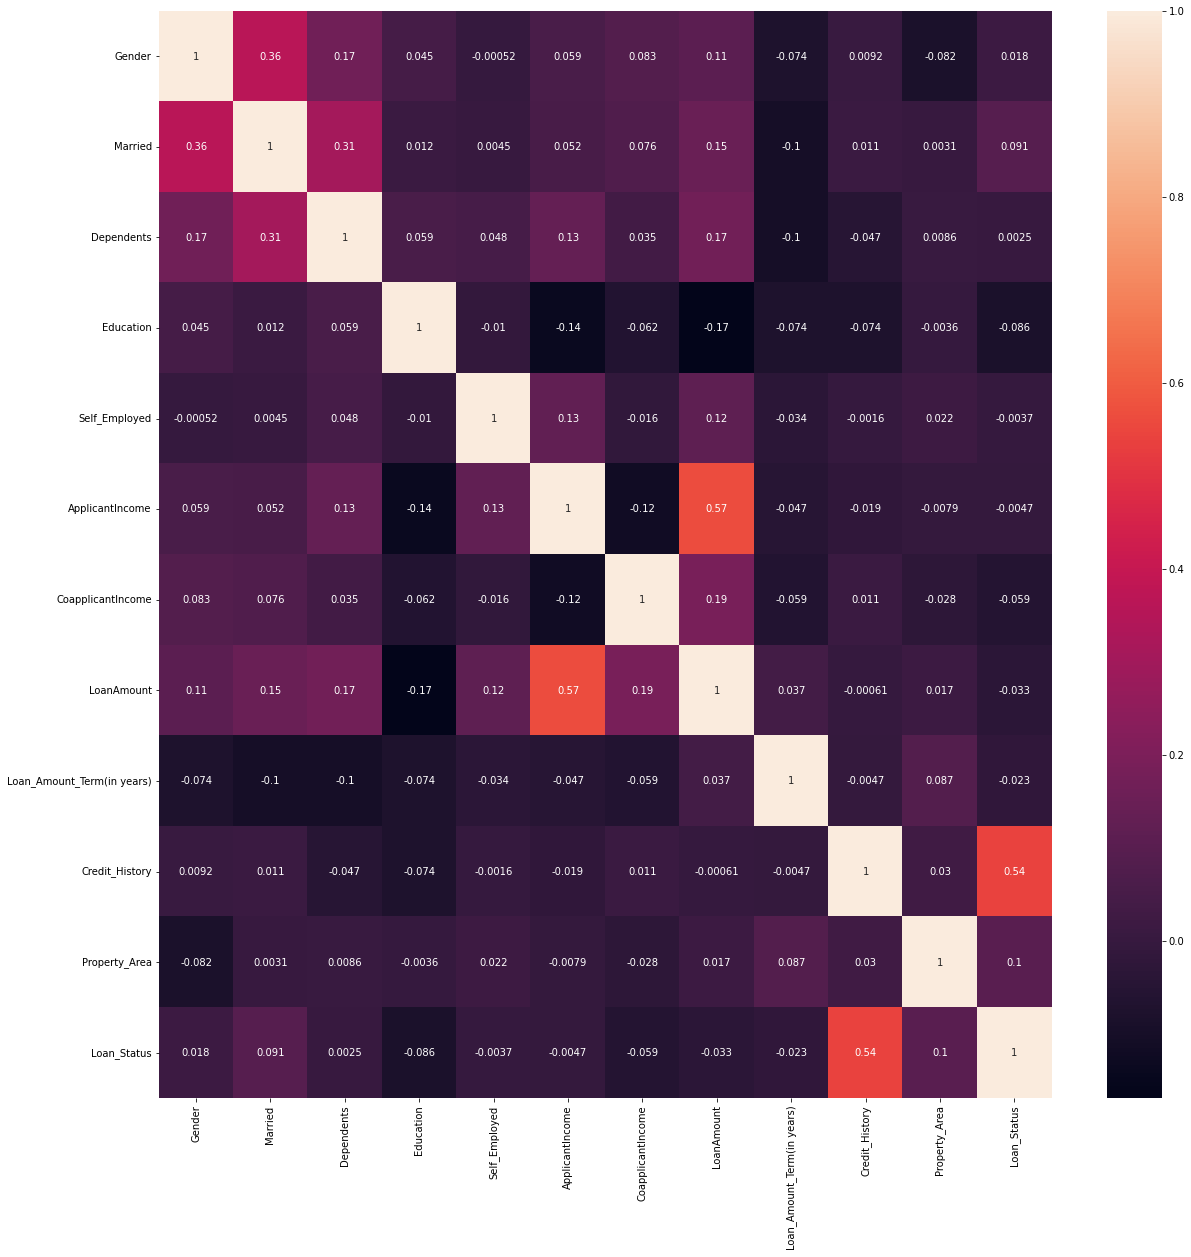

In [ ]:
# Arrange the size of the graph
plt.figure(figsize = (20,20))

# Plotting the correlation using heatmap
sns.heatmap(df.corr(), annot = True)


* **Conclusion:** The above plot shows the following:
1. Credit History is the highest correlated feature, among all the features, with respect to loan status.
2. Property Area is the next highly correlated feature with respect to loan status. It signifies that it also matters where the applicant's property is located in deciding whether a loan will be provided or not
3. Education, Self Employed, Applicant Income, Coapplicant Income, Loan Amount and Loan Amount Term are negatively correlated to the Loan Status. 
4. However, it should be noted that correlation doesn't imply causation. 
5. This method is not much powerful hence, we will use another method for feature selection

* **METHOD 2 - FEATURE IMPORTANCE**

In [ ]:
# Splitting the features and the target variable
X = df.drop('Loan_Status', axis = 1)
Y = df.Loan_Status

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term(in years),Credit_History,Property_Area
0,1,0,0,0,0,0.070489,0.000000,0.172214,30,1,0
1,1,1,1,0,0,0.054830,0.036192,0.172214,30,1,1
2,1,1,0,0,1,0.035250,0.000000,0.082489,30,1,0
3,1,1,0,1,0,0.030093,0.056592,0.160637,30,1,0
4,1,0,0,0,0,0.072356,0.000000,0.191027,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.034014,0.000000,0.089725,30,1,1
610,1,1,4,0,0,0.048930,0.000000,0.044863,15,1,1
611,1,1,1,0,0,0.097984,0.005760,0.353111,30,1,0
612,1,1,2,0,0,0.091936,0.000000,0.257598,30,1,0


In [ ]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
# Building the model
model = ExtraTreesClassifier()

# Fitting the model 
model.fit(X,Y)

# Computing the importance/strength of each feature
model.feature_importances_

array([0.02001764, 0.01915225, 0.05968279, 0.02106914, 0.02195842,
       0.18448821, 0.11758596, 0.17987065, 0.04539395, 0.28035736,
       0.05042363])

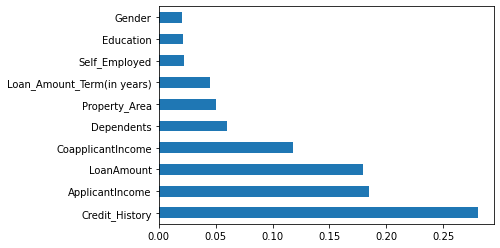

In [ ]:
# Storing the importance of features in series. 
important_features = pd.Series(model.feature_importances_ , index = X.columns)

# Visualizing top 10 features with respect to the target
important_features.nlargest(10).plot(kind = 'barh')

**Conclusion:** 
1. The graph shows the importance of top 10 features in ascending order with Education as least important and Credit_History as highly important feature. 
2. Top 7 important features we will consider: Credit_History, ApplicantIncome, LoanAmount, CoapplicantIncome, Dependents, Property_Area, Loan_Amount_term(in years).

In [ ]:
# Creating a list of important features
list(important_features.nlargest(7).index)

['Credit_History',
 'ApplicantIncome',
 'LoanAmount',
 'CoapplicantIncome',
 'Dependents',
 'Property_Area',
 'Loan_Amount_Term(in years)']

In [ ]:
# Creating a new X with top 7 features
new_X = df[list(important_features.nlargest(7).index)]
new_X

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Property_Area,Loan_Amount_Term(in years)
0,1,0.070489,0.172214,0.000000,0,0,30
1,1,0.054830,0.172214,0.036192,1,1,30
2,1,0.035250,0.082489,0.000000,0,0,30
3,1,0.030093,0.160637,0.056592,0,0,30
4,1,0.072356,0.191027,0.000000,0,0,30
...,...,...,...,...,...,...,...
609,1,0.034014,0.089725,0.000000,0,1,30
610,1,0.048930,0.044863,0.000000,4,1,15
611,1,0.097984,0.353111,0.005760,1,0,30
612,1,0.091936,0.257598,0.000000,2,0,30


In [ ]:
# Creating a new_df_test with top 7 features (same as training dataset)
new_df_test = df_test[list(important_features.nlargest(7).index)]

# **SPLITTING THE DATA TO TRAINING AND TESTING DATASETS**

In [ ]:
# Splitting the data using train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, Y, test_size = 0.20, random_state = 42)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

491
123
491
123


# **CHOOSING AN APPROPIATE MODEL**

* **MODEL 1 - RANDOM FOREST CALSSIFIER**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting



In [ ]:
# Instantiating RandomForestClassifier
model1 = RandomForestClassifier() 

**Performing the Hyperparameter Tuning to get the best parametric value for the model using RandomisezSeacrhCV**

In [ ]:
# Number of trees in a Random Forest
n_estimators = [i for i in range(100, 1300, 100)]

# The number of features to consider when looking for the best split:
max_features = ['auto', 'log2']

# The maximum depth of the tree
max_depth = [i for i in np.linspace(start = 5, stop = 40, num = 6)]

# The minimum number of samples required to split an internal node:
min_samples_split = [2,10,15,25,50,100]

# The minimum number of samples required to be at a leaf node
min_samples_leaf = [1,5,10,15]\

# The function to measure the quality of a split
criterion = ['gini', 'entropy']


In [ ]:
# Creating a hyperparameter grid
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf, 
    'criterion':criterion
}

In [ ]:
# Instantiating RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator = model1,
                               param_distributions = random_grid,
                               scoring = 'accuracy',
                               n_jobs = 1,
                               random_state = 42,
                               verbose = 2,
                               cv = 5)

* **Training the Model**

In [ ]:
# Fit the model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=12.0, max_features=auto, min_samples_leaf=15, min_samples_split=100, n_estimators=900; total time=   1.5s
[CV] END criterion=gini, max_depth=12.0, max_features=auto, min_samples_leaf=15, min_samples_split=100, n_estimators=900; total time=   1.4s
[CV] END criterion=gini, max_depth=12.0, max_features=auto, min_samples_leaf=15, min_samples_split=100, n_estimators=900; total time=   1.4s
[CV] END criterion=gini, max_depth=12.0, max_features=auto, min_samples_leaf=15, min_samples_split=100, n_estimators=900; total time=   1.4s
[CV] END criterion=gini, max_depth=12.0, max_features=auto, min_samples_leaf=15, min_samples_split=100, n_estimators=900; total time=   1.4s
[CV] END criterion=entropy, max_depth=26.0, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=26.0, max_features=auto, min_samples_leaf=10, min_sa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5.0, 12.0, 19.0, 26.0,
                                                      33.0, 40.0],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 5, 10, 15],
                                        'min_samples_split': [2, 10, 15, 25, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Returns the best parameters.
rf_random.best_params_

{'criterion': 'entropy',
 'max_depth': 26.0,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 100,
 'n_estimators': 300}

* **Testing the Model**

In [ ]:
# Predicting the values of target variable on X_test 
Y_pred = rf_random.predict(X_test)

In [ ]:
# Comparing actual results with predicted results 
final = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
final

,Actual,Predicted
350,1,1
377,1,1
163,1,1
609,1,1
132,1,1
...,...,...
231,1,1
312,1,1
248,1,1
11,1,1


* **Checking the Performance/accuracy**

In [ ]:
# Check the accuracy using confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[18, 25],
       [ 1, 79]])

In [ ]:
# Calculating accuracy -> by dividing the sum of diagonal elements with the sum of all the elements of confusion_matrix
accuracy = (18+79)/(18+25+1+79)
accuracy

0.7886178861788617

In [ ]:
# Check the accuracy using classification_report
classification_report(Y_test, Y_pred)


'              precision    recall  f1-score   support\n\n           0       0.95      0.42      0.58        43\n           1       0.76      0.99      0.86        80\n\n    accuracy                           0.79       123\n   macro avg       0.85      0.70      0.72       123\nweighted avg       0.83      0.79      0.76       123\n'

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80
    accuracy                           0.79       123

   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


* **Conclusion:**
1. We get Accuracy = 0.79 using both confusion_matrix and classification_report. 
2. It says that the our model will predict correctly 79% of the time. 

* **MODEL 2 - DECISION TREE CLASSIFIER**

Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions. 

In [ ]:
# Instantiating DecisionTreeClassifier
model2 = DecisionTreeClassifier()

* **Training the Model**

In [ ]:
# Fitting the model
model2.fit(X_train, Y_train)

DecisionTreeClassifier()

* **Testing the Model**

In [ ]:
# Predicting the values of X_test
Y_pred2 = model2.predict(X_test)

* **Checking the Performance/accuracy**

In [ ]:
# Check the accuracy using confusion_matrix
confusion_matrix(Y_test, Y_pred2)

array([[23, 20],
       [13, 67]])

In [ ]:
# Calculating accuracy -> by dividing the sum of diagonal elements with the sum of all the elements of confusion_matrix
accuracy = (21+68)/(21+22+12+68)
accuracy

0.7235772357723578

In [ ]:
# Check the accuracy using classification_report
classification_report(Y_test, Y_pred2)

'              precision    recall  f1-score   support\n\n           0       0.64      0.53      0.58        43\n           1       0.77      0.84      0.80        80\n\n    accuracy                           0.73       123\n   macro avg       0.70      0.69      0.69       123\nweighted avg       0.72      0.73      0.73       123\n'

* **Conclusion:**
1. We get Accuracy = 0.72 using both confusion_matrix and classification_report.
2. It says that the our model will predict correctly 72% of the time.

* **MODEL 3 - LOGISTIC REGRESSION**

Logistic regression, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a sigmoid function.

In [ ]:
# Instantiating LogisticRegression
model3 = LogisticRegression()

* **Training the Model**

In [ ]:
# Fitting the model
model3.fit(X_train, Y_train)

LogisticRegression()

* **Testing the Model**

In [ ]:
# Predicting the values of X_test
Y_pred3 = model2.predict(X_test)

* **Checking the Performance/accuracy**

In [ ]:
# Check the accuracy using confusion_matrix
confusion_matrix(Y_test, Y_pred3)

array([[23, 20],
       [13, 67]])

In [ ]:
# Calculating accuracy -> by dividing the sum of diagonal elements with the sum of all the elements of confusion_matrix
accuracy = (21+68)/(21+22+12+68)
accuracy

0.7235772357723578

In [ ]:
# Check the accuracy using classification_report
classification_report(Y_test, Y_pred3)

'              precision    recall  f1-score   support\n\n           0       0.64      0.53      0.58        43\n           1       0.77      0.84      0.80        80\n\n    accuracy                           0.73       123\n   macro avg       0.70      0.69      0.69       123\nweighted avg       0.72      0.73      0.73       123\n'

* **Conclusion:**
1. We get Accuracy = 0.72 using both confusion_matrix and classification_report.
2. It says that the our model will predict correctly 72% of the time.
3. LogisticRegression Confusion_matrix is very similar to DecisionTreeClassifier and hence, the accuracy of both the models are similar


# **QUESTION/ANSWERS**

**Q8. What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)**

* Top 7 important features we are considering are Credit_History, ApplicantIncome, LoanAmount, CoapplicantIncome, Dependents, Property_Area, Loan_Amount_term(in years).
* This is because in Feature Selection these features has the highest strength among all the features and helps the most in predicting the target variable.

**Q9. Which model are you going to choose and define the reason for going with the same model?**

The model I chose here is RandomForestClassifier. This is because of the following resons:
* It is a classification algorithm and classification algorithm is used when the output of the dataset is in categorical form. 
* In this dataset, the accuracy of this model is highest (= 0.79) vis-a-vis other model i.e. DecisionTreeClassifier and LogisticRegression where accuracy is 0.70 and 0.71 respectively.
* It is highly accurate because of the multiple decision trees participating in the process.
* It overcomes the overfitting problem.

**Q10. Have you performed the Hyper Parameter Tuning?**

Yes, the Hyper Paramter Tuning has been performed to determine the best parameters for the model. 

**Q11. Compare the Actual results with the Predicted results**

In [ ]:
# Comparing actual results with predicted results 
final = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
final

,Actual,Predicted
350,1,1
377,1,1
163,1,1
609,1,1
132,1,1
...,...,...
231,1,1
312,1,1
248,1,1
11,1,1


**Q12. What's the accuracy of your model?**

0.79

# **PICKLE/DUMP THE MODEL**

In [ ]:
# Pickling the model
filename='loan_pred_model'
pickle.dump(rf_random,open(filename,'wb'))

In [ ]:
# load the pickled object
loaded_model=pickle.load(open(filename,'rb'))

# Predict the values of new_df_test
loaded_model.predict(new_df_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,